# Problem Statement:

This data set consists of the physical parameters of three species of flower — Versicolor, Setosa and Virginica. The numeric parameters which the dataset contains are Sepal width, Sepal length, Petal width and Petal length. In this data i will be predicting the classes of the flowers based on these parameters.The data consists of continuous numeric values which describe the dimensions of the respective features. I will be training the model based on these features.

![title](Iris.png)

## Data Set Information:

This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other. 

Predicted attribute: class of iris plant. 

This is an exceedingly simple domain. 

This data differs from the data presented in Fishers article (identified by Steve Chadwick, spchadwick '@' espeedaz.net ). The 35th sample should be: 4.9,3.1,1.5,0.2,"Iris-setosa" where the error is in the fourth feature. The 38th sample: 4.9,3.6,1.4,0.1,"Iris-setosa" where the errors are in the second and third features.


## Attribute Information:

1. sepal length in cm 
2. sepal width in cm 
3. petal length in cm 
4. petal width in cm 
5. class: 
-- Iris Setosa 
-- Iris Versicolour 
-- Iris Virginica

## Solution/Approach
#### Steps
1. Reading csv/tsv etc file and then checking dimension,few rows to know little about data etc
2. Variable identification to know about <b>continuous or categorical in nature</b>
3. Univariate analysis<br/>
    A. Continuous Variables<br/>
    Tabular and graphical method is used to know about <b>mean,median,mode,missing values,Q1,Q3,skewness,outliers</b> etc
    
    B. Categorical Variables<br/>
    Tabular and graphical method is used to know about number of times each value occuring in that particular column<br/>
    <br/>
4. Bivariate analysis<br/>
    Tabular and graphical method is used to know about relation between continuous-continuous variables using            
    <b>correlation</b>,categorical-continuous variables using <b>t-test</b> and categorical-categorical variables using     
    <b>chi2_contingency</b> etc
5. Missing Values Treatment<br/>
    For continuous variables i am replacing missing values by zero,mean or median etc.It totally depends on type of values     
    present.<br/>
    For categorical variables i am replacing missing values by zero,mode etc.It totally depends on type of values present.
6. Outliers Treatment:<br/>
    Using <b>box plot</b>, i am able to find outliers then using <b>IQR</b> , i am replacing that outliers with mean,median or     mode.
7. Variable Transormation:<br/>
    According to <b>left or right skewness</b>, transforming variables by using log,square,cube etc to obtain <b>symmetrical         distrribution</b>
    
8. Modeling:<br/>
   a.Converting categorical variable into <b>dummies variables</b><br/>
   b.Separating indepedent and dependent variable from our data set<br/>
   c.Splitting these separated data into train and test data,must keeping <b>random_state=Numerical value</b><br/>
   d.Using LogisticRegression object to fit the model on our train data<br/>
   e.Now Predicting the value for test data<br/>
   f.Finally checking the accuracy of our model.<br/>

## 1. Reading file

In [1]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# reading data from file
# see there is no extension of .csv in this file
# think why i put header equals None

df=pd.read_csv("iris.data",header=None)

In [3]:
# checking dimension

df.shape

(150, 5)

In [4]:
# seeing first 5 rows

df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# as in above table there is no column name which is representing that particular columns

col=["sepal length in cm","sepal width in cm","petal length in cm","petal width in cm","class/species"]
df.columns=col
df.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class/species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.columns

Index(['sepal length in cm', 'sepal width in cm', 'petal length in cm',
       'petal width in cm', 'class/species'],
      dtype='object')

## 2. Variable Identification

In [7]:
# checking nature ( categorical and continuous ) of variable

df.dtypes

sepal length in cm    float64
sepal width in cm     float64
petal length in cm    float64
petal width in cm     float64
class/species          object
dtype: object

## 3. Univariate analysis

### 3.1 Continuous variable ( float ,int etc )

In [8]:
# tabular method

# creating frequency table
# it gives only summary related to continuous variable
# count values shows number of non-zero values in that particular column but here in all columns corresponding to count has value
# equals to no. of rows of this data frame which implies there is no missing values in these columns

df.describe()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


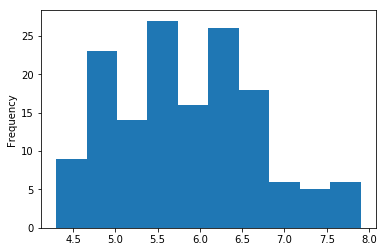

In [9]:
# graphical method

# plt is not working in place of 'plot' think why?
# right skewed

df['sepal length in cm'].plot.hist()

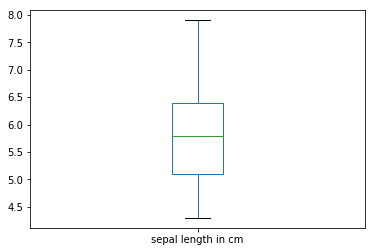

In [10]:
# box plot is used for checking outliers
# Q2 is little closer to Q3 which also implies right skewed(already observed in just above step)
# no outliers

df['sepal length in cm'].plot.box()

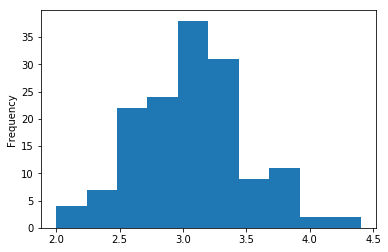

In [11]:
# symmetric distributed

df['sepal width in cm'].plot.hist()

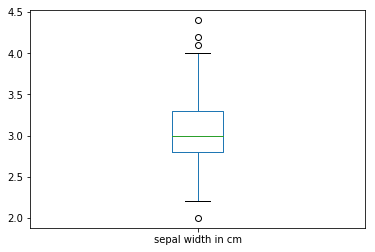

In [12]:
# here we have outliers

df['sepal width in cm'].plot.box()

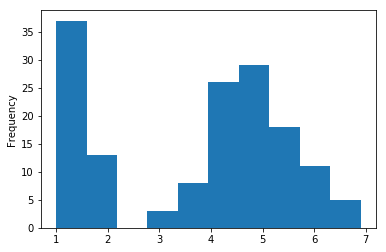

In [13]:
# observe box plot below to know about skewness

df['petal length in cm'].plot.hist()

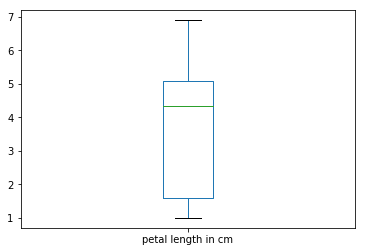

In [14]:
# Right skewness as Q2 is closer to Q3

df['petal length in cm'].plot.box()

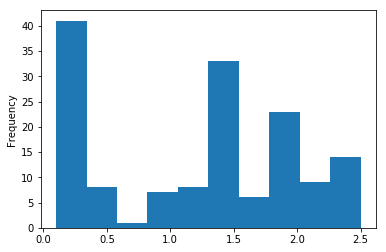

In [15]:
# # observe box plot below to know about skewness

df['petal width in cm'].plot.hist()

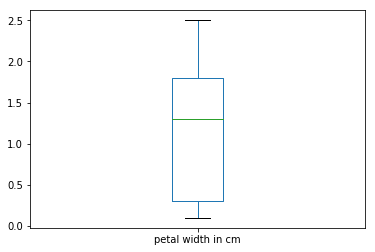

In [16]:
# Right skewness as Q2 is closer to Q3

df['petal width in cm'].plot.box()

### 3.2 Categorical variable ( object )

In [17]:
# tabular method

# creating frequency table
# it gives number of times each categorical values appears in that column

df['class/species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: class/species, dtype: int64

In [18]:
# in percentage format

df['class/species'].value_counts()/len(df['class/species'])

Iris-versicolor    0.333333
Iris-virginica     0.333333
Iris-setosa        0.333333
Name: class/species, dtype: float64

In [19]:
df['class/species'].value_counts(normalize=True)

Iris-versicolor    0.333333
Iris-virginica     0.333333
Iris-setosa        0.333333
Name: class/species, dtype: float64

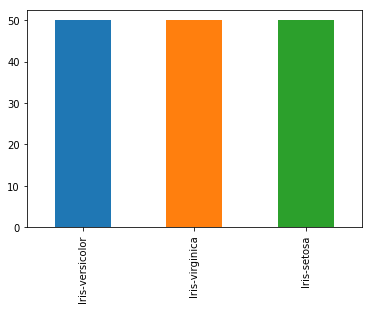

In [20]:
# graphical method

# think why below code is not working
# df['class/species'].plot.bar()

df['class/species'].value_counts().plot.bar()

## 4. Bivariate analysis

### 4.1 continuous-continuous variable

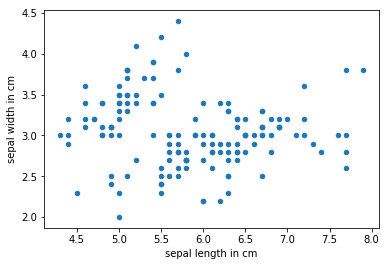

In [21]:
# observe we don't need xlabel and ylabel by this method

df.plot.scatter("sepal length in cm","sepal width in cm")

In [22]:
# correlation

df['sepal length in cm'].corr(df['sepal width in cm'])

-0.1093692499506493

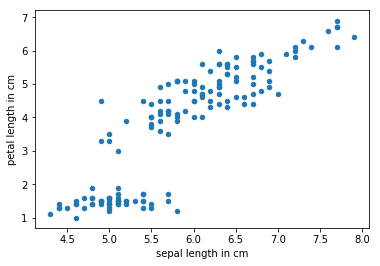

In [23]:
df.plot.scatter("sepal length in cm","petal length in cm")

In [24]:
# correlation between all continuous variables

# now see above two scatter plot and relate these correlation value

df.corr()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
sepal length in cm,1.000000,-0.109369,0.871754,0.817954
sepal width in cm,-0.109369,1.000000,-0.420516,-0.356544
petal length in cm,0.871754,-0.420516,1.000000,0.962757
petal width in cm,0.817954,-0.356544,0.962757,1.000000


### 4.2 continuous-categorical variable

In [25]:
# think how this is working

df.groupby('class/species')['sepal length in cm'].mean()

class/species
Iris-setosa        5.006
Iris-versicolor    5.936
Iris-virginica     6.588
Name: sepal length in cm, dtype: float64

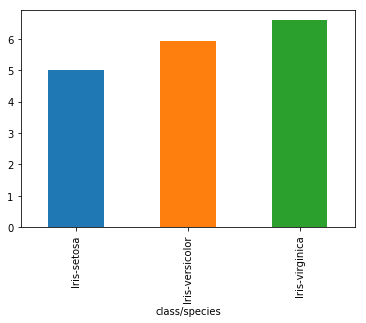

In [26]:
df.groupby('class/species')['sepal length in cm'].mean().plot.bar()

In [27]:
# now performing ttest to see is it statistically difference

from scipy.stats import ttest_ind

In [28]:
Iris_setosa=df[df['class/species']=='Iris-setosa']

In [29]:
Iris_setosa.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class/species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [30]:
Iris_versicolor=df[df['class/species']=='Iris-versicolor']

In [31]:
Iris_virginica=df[df['class/species']=='Iris-virginica']

In [32]:
# nan_policy is used when we have missing values but here we don't have any missing cell

ttest_ind(Iris_setosa['sepal length in cm'],Iris_versicolor['sepal length in cm'],nan_policy='omit')

Ttest_indResult(statistic=-10.52098626754911, pvalue=8.985235037487077e-18)

In [33]:
# read below 
# ttest_ind?

ttest_ind(Iris_setosa['sepal length in cm'],Iris_virginica['sepal length in cm'])

Ttest_indResult(statistic=-15.386195820079404, pvalue=6.892546060674059e-28)

### 4.3 categorical-categorical variable

we have only one categorical variable in our dataset so we don't perform this step in this question.<br/>
In this step we use crosstab and chi-square

## 5.Treating missing values

But in this dataset we don't have any missing value so we don't perform this step in this question

## 6.Treating outliers

In [34]:
# first finding outliers

# for univariate 

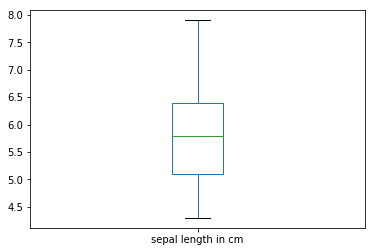

In [35]:
df1=df['sepal length in cm'].plot.box()

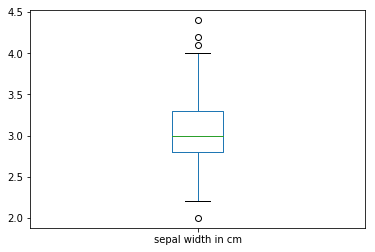

In [36]:
# outlier is present

df['sepal width in cm'].plot.box()

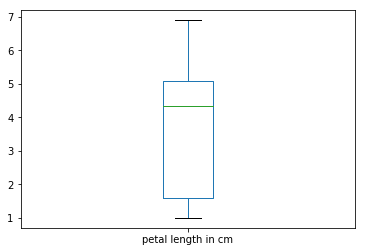

In [37]:
df3=df['petal length in cm'].plot.box()

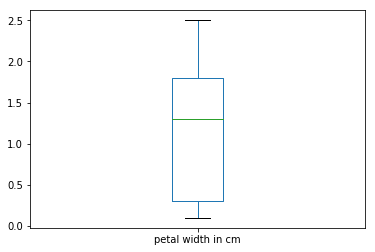

In [38]:
df4=df['petal width in cm'].plot.box()

In [39]:
# replacing outliers in 'sepal width in cm' with mean 'sepal width in cm' value
df.loc[df['sepal width in cm']>4.05]#-np.mean(df['sepal width in cm'])


,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class/species
15,5.7,4.4,1.5,0.4,Iris-setosa
32,5.2,4.1,1.5,0.1,Iris-setosa
33,5.5,4.2,1.4,0.2,Iris-setosa


In [40]:
df.loc[df['sepal width in cm']>4.05,'sepal width in cm']

15    4.4
32    4.1
33    4.2
Name: sepal width in cm, dtype: float64

In [41]:
df.loc[(df['sepal width in cm']>4.05) | (df['sepal width in cm']<2.05),'sepal width in cm']=np.mean(df['sepal width in cm'])

# this step is not working b'coz in next step i m not able to remove outliers using boxplot

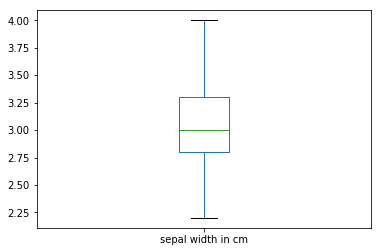

In [42]:
df['sepal width in cm'].plot.box()

In [43]:
# now checking outliers for bivariate

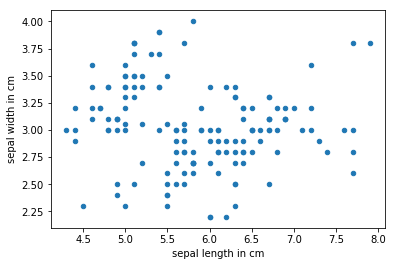

In [44]:
df.plot.scatter('sepal length in cm','sepal width in cm')

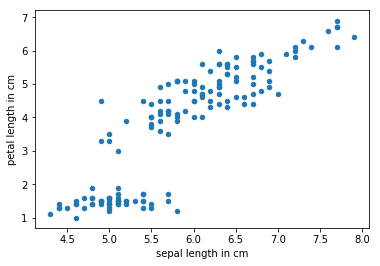

In [45]:
df.plot.scatter('sepal length in cm','petal length in cm')

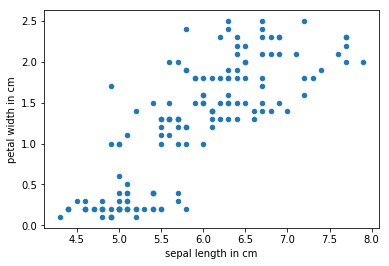

In [46]:
df.plot.scatter('sepal length in cm','petal width in cm')

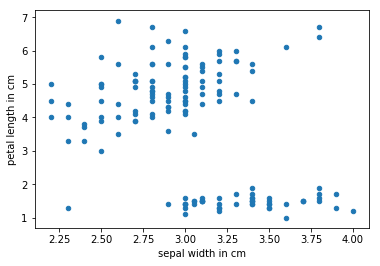

In [47]:
df.plot.scatter('sepal width in cm','petal length in cm')

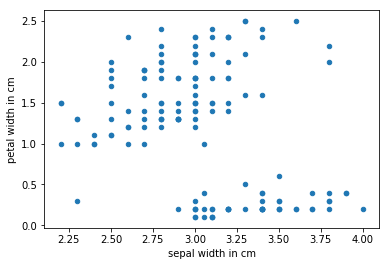

In [48]:
df.plot.scatter('sepal width in cm','petal width in cm')

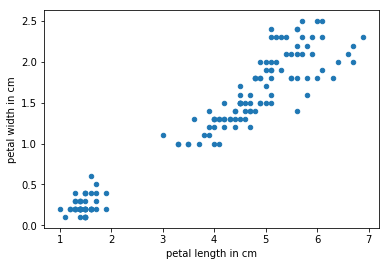

In [49]:
df.plot.scatter('petal length in cm','petal width in cm')

In [50]:
# in any of six above scatter plot as there is very less chance of outliers but let suppose we have 
# outliers in last scatter plot,so how we handle it

In [51]:
df[df['petal width in cm']<0.7].head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class/species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


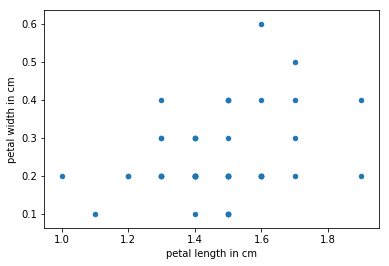

In [52]:
# now compare this scatter plot with just above plotted scatter plot

df[df['petal width in cm']<0.7].plot.scatter('petal length in cm','petal width in cm')

## 7.Variable Transformation

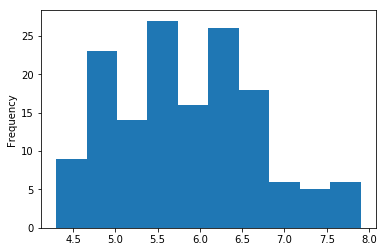

In [53]:
df['sepal length in cm'].plot.hist()

# it is little right skewed

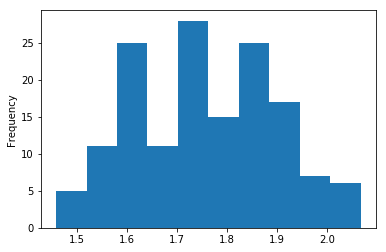

In [54]:
# now it is equally left and right skewed
# logarithmic method

np.log(df['sepal length in cm']).plot.hist()

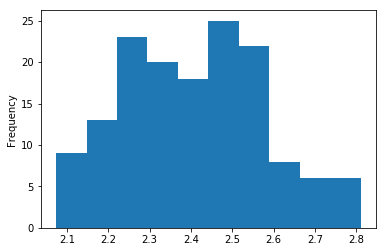

In [55]:
# square root method

np.sqrt(df['sepal length in cm']).plot.hist()

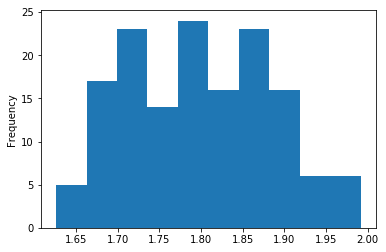

In [56]:
# cuberoot method

np.power(df['sepal length in cm'],1/3).plot.hist()

In [57]:
# above three method choose best method which is exactly similar to normal distribution

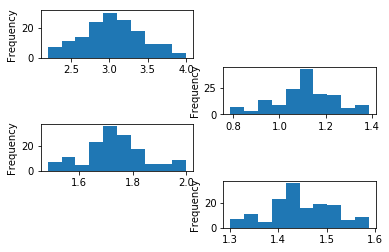

In [58]:
# observe which one is more symmetric
# 2nd plot is more symmetric

plt.figure(1)
plt.subplot(421)
df['sepal width in cm'].plot.hist()
plt.subplot(424)
np.log(df['sepal width in cm']).plot.hist()
plt.subplot(425)
np.sqrt(df['sepal width in cm']).plot.hist()
plt.subplot(428)
np.power(df['sepal width in cm'],1/3).plot.hist()


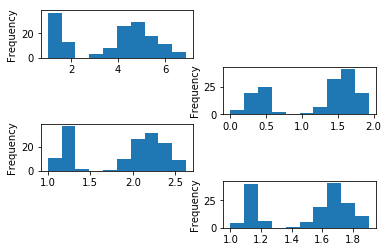

In [59]:
# observe which one is more symmetric

plt.figure(2)
plt.subplot(421)
df['petal length in cm'].plot.hist()
plt.subplot(424)
np.log(df['petal length in cm']).plot.hist()
plt.subplot(425)
np.sqrt(df['petal length in cm']).plot.hist()
plt.subplot(428)
np.power(df['petal length in cm'],1/3).plot.hist()

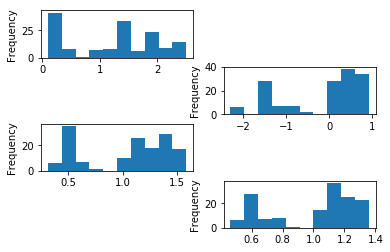

In [60]:
# observe which one is more symmetric

plt.figure(3)
plt.subplot(421)
df['petal width in cm'].plot.hist()
plt.subplot(424)
np.log(df['petal width in cm']).plot.hist()
plt.subplot(425)
np.sqrt(df['petal width in cm']).plot.hist()
plt.subplot(428)
np.power(df['petal width in cm'],1/3).plot.hist()

# Predictive Modelling

In [61]:
# separating independent variables

x=df.drop('class/species',axis=1)
x.shape

(150, 4)

In [62]:
# separating dependent variables

y=df['class/species']
y.shape

(150,)

In [63]:
# there is no problem with continuous variable but i have to change categorical varible into dummies
# variable because scikit learn always works with numerical data

#y=pd.get_dummies(y)
#y.shape

In [64]:
from sklearn.cross_validation import train_test_split

# now splitting the our data into four set to perform fitting and then prediction

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [65]:
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression()

In [66]:
logreg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [67]:
pred=logreg.predict(x_test)

In [68]:
# checking accuracy 

logreg.score(x_test,y_test)

0.9666666666666667

In [69]:
logreg.score(x_train,y_train)

0.9666666666666667

In [70]:
from sklearn.metrics import accuracy_score

# checking how accurate our predictions are by calculating the accuracy

accuracy_score(y_test,pred)

0.9666666666666667